<a href="https://colab.research.google.com/github/GiorgosLyberis/mcda/blob/main/Methods%20For%20Statistical%20Data%20Analysis/Lab_3/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Confidence intervals

 [1] 0.7704797 1.4837486 2.1196357 1.4246805 1.0164093 1.4296109 1.4170649
 [8] 2.5952136 1.7856242 2.0829728 1.7900353 1.9375541 1.8676295 1.9509939
[15] 1.8660388 1.1059098 1.4675001 1.4822130 3.8816596 2.0088888 1.3930589
[22] 2.0042117 1.6539715 0.5827458 1.4876468 1.0514075 1.5876891 1.2500432
[29] 1.3998556 1.4738536


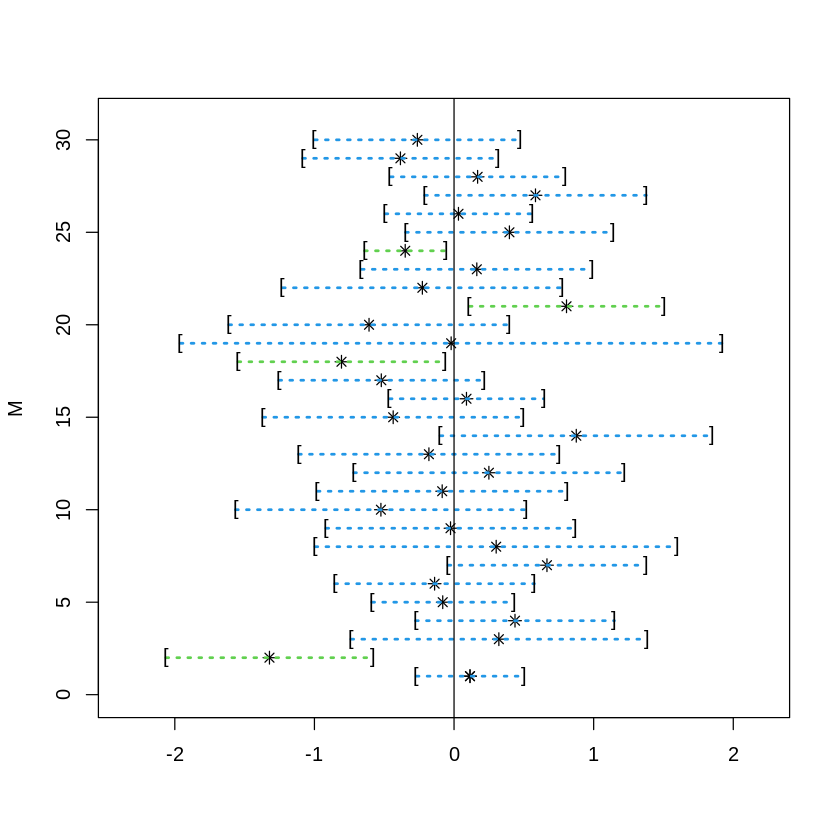

In [1]:
#
# M diastmnmata s.e. 1-a, gia meso kavovikou (apo N(m,s_j^2) j=1,...,M)
# deigmatos mege8ous n, me agvwstn diaspora
#

N2<-function(M,n,a,m,s) {
y<-array(rep(0,2*M),dim=c(M,2))
for (i in 1:M) {
x<-rnorm(n,m,s[i])
y[i,1]<-mean(x)+qt(a/2,n-1)*sqrt(var(x)/n)
y[i,2]<-mean(x)+qt(1-a/2,n-1)*sqrt(var(x)/n)  # ta akpa tou diastnmatos
}
for (i in 1:M) {
if  (i==1) {
plot((y[1,1]+y[1,2])/2,1,pch=8,xlim=c(min(y[,1])-0.3,max(y[,2])+0.3),ylim=c(0,M+1),xlab=" "
#,xlab="[x-tn-1(a/2)S/sqrt(n),x+tn-1(a/2)S/sqrt(n)]"
,ylab="M")
}
if ((y[i,1]>m)||(y[i,2]<m)){
points((y[i,1]+y[i,2])/2,i,pch=8,col=1)
lines(c(y[i,1],y[i,2]),c(i,i),lty = 3,lwd=2.2,col=3)
text(y[i,1],i,"[",col=1)
text(y[i,2],i,"]",col=1)}
# snmeiwvei to kevtpo kai opio8etei ta akpa tou diastnmatos
if ((y[i,1]<m)&(y[i,2]>m)){
points((y[i,1]+y[i,2])/2,i,pch=8,col=1)
lines(c(y[i,1],y[i,2]),c(i,i),lty = 3,lwd=2.2,col=4)
text(y[i,1],i,"[",col=1)
text(y[i,2],i,"]",col=1)}
}
abline(v = m,col=1)
# snmeiwvei tnv pragmatikn mesn timn
print(y[,2]-y[,1])
# ektupwvei to eupos ka8e diastnmatos
 }

s<-runif(30,1,2) # the standard deviation is random U(1,2)
N2(30,10,0.1,0,s)

[1] 1.685008 2.021856

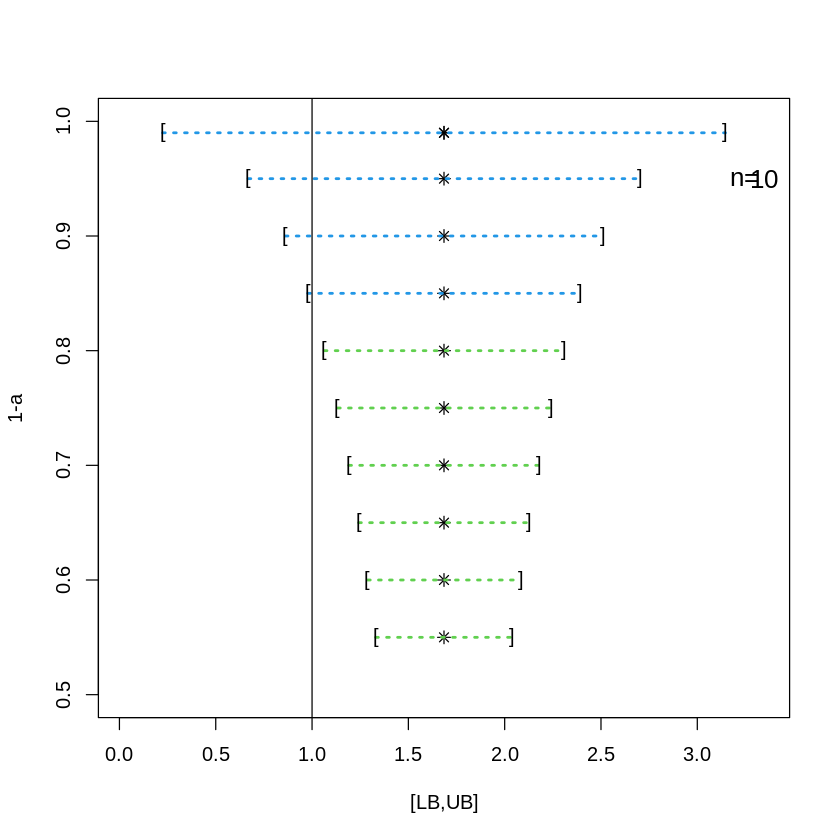

In [2]:
#
#  Confidence Intervals gia meso kavovikns (agvwstn diaspora)
#  diafopetikoi s.e.
#
x<-c(
  5.09787041, 2.28965487, 2.43218122, 0.86540021, 0.91974851,
  0.55373450, 1.28536466, 1.22803143, 0.08675835, 2.09133592)

# x
n<-length(x)
c(mean(x),var(x))

m<-1
s<-sqrt(var(x))
A<-c(0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45)
A<-sort(A)
CL<-1-A
# various c.l.
n1<-length(A)
y<-array(rep(0,2*n1),dim=c(n1,2))
i<-0
for (a in A) {
i<-i+1
y[i,1]<-mean(x)+qt(a/2,n-1)*s/sqrt(n)
y[i,2]<-mean(x)+qt(1-a/2,n-1)*s/sqrt(n)
}
for (i in 1:n1) {
if  (i==1) {
plot((y[1,1]+y[1,2])/2,CL[1],pch=8,xlim=c(min(y[,1])-0.2,max(y[,2])+0.2),ylim=c(min(CL)-0.05,1),xlab="[LB,UB]",ylab="1-a",col=1)
}
if ((y[i,1]>m)||(y[i,2]<m)){
points((y[i,1]+y[i,2])/2,CL[i],pch=8,col=1)
lines(c(y[i,1],y[i,2]),c(CL[i],CL[i]),lty = 3,lwd=2.2,col=3)
text(y[i,1],CL[i],"[",col=1)
text(y[i,2],CL[i],"]",col=1)}
if ((y[i,1]<m)&(y[i,2]>m)){
points((y[i,1]+y[i,2])/2,CL[i],pch=8,col=1)
lines(c(y[i,1],y[i,2]),c(CL[i],CL[i]),lty = 3,lwd=2.2,col=4)
text(y[i,1],CL[i],"[",col=1)
text(y[i,2],CL[i],"]",col=1)}
}
abline(v = m,col=1)
text(max(y[,2])+0.1,0.95,"n=",cex=1.3)
text(max(y[,2])+0.2,0.95,n,cex=1.3)

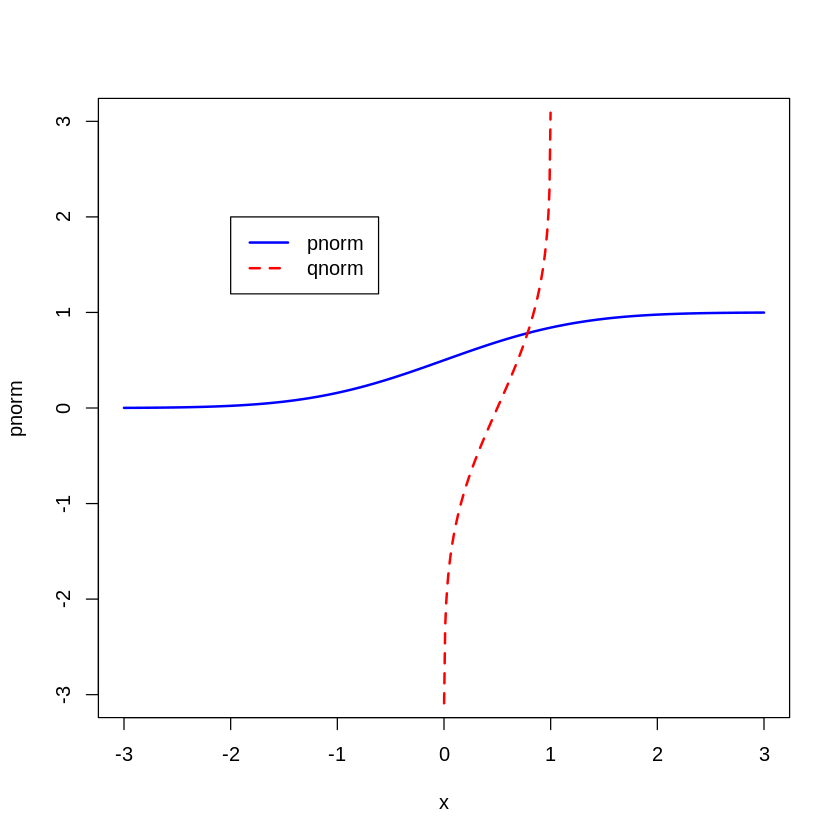

In [3]:
#   Posotntes Odngoi
#


###########################################################################
#   cdf of N(0,1)
#   inverse cdf N(0,1)
#
plot(pnorm,xlim=c(-3,3),ylim=c(-3,3),col="blue",lwd=2)
curve(qnorm(x),xlim=c(0.001,0.999),add=T,col="red",lty=2,lwd=2)
legend(-2,2,legend=c("pnorm","qnorm"),col=c("blue","red"),lty=c(1,2),lwd=2)

In [4]:
#  posostiaia snmeia N(0,1)
#  kai ta avtistoixa tns t_2 t_5 t_10 t_30 t_50
#

pnorm(-2)
pnorm(-1)
pnorm(c(0,1,2,3))
qnorm(0.05)
qnorm(0.5)  #median
qnorm(0.95)

[1] 0.02275013

[1] 0.1586553

[1] 0.5000000 0.8413447 0.9772499 0.9986501

[1] -1.644854

[1] 0

[1] 1.644854

In [5]:
#  posostiaia snmeia X^2 df=3, 10, 20


#df=3
v<-3
pchisq(-1,df=v)
pchisq(c(1,3,9),v)
qchisq(0.05,v)
qchisq(0.5,v)  #median
qchisq(0.95,v)

#df=10
v<-10
pchisq(c(1,10,23),v)
qchisq(0.05,v)
qchisq(0.5,v)  #median
qchisq(0.95,v)

#df=20
v<-20
qchisq(0.05,v)
pchisq(c(1,20,36),v)
qchisq(0.5,v)   #median
qchisq(0.95,v)

[1] 0

[1] 0.1987480 0.6083748 0.9707091

[1] 0.3518463

[1] 2.365974

[1] 7.814728

[1] 0.0001721156 0.5595067149 0.9892534216

[1] 3.940299

[1] 9.341818

[1] 18.30704

[1] 10.85081

[1] 1.709670e-10 5.420703e-01 9.846189e-01

[1] 19.33743

[1] 31.41043

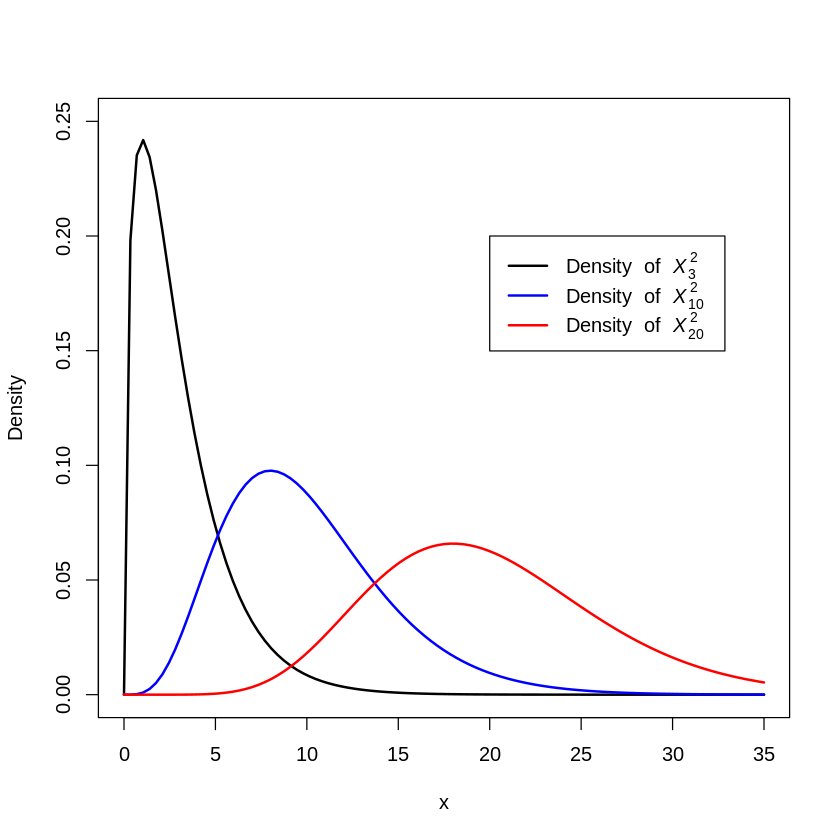

In [6]:
#
# suvaptnsn pukvotntas tns X^2
# df=3  10  20


curve(dchisq(x,df=3),0,35,ylim=c(0,0.25),ylab="Density",lwd=2)
curve(dchisq(x,df=10),xlim=c(0,35),col="blue",add=T,lwd=2)
curve(dchisq(x,df=20),xlim=c(0,35),col="red",add=T,lwd=2)
legend(20,0.2,
      legend=c(expression(Density~of~italic(X)[3]^2),
      expression(Density~of~italic(X)[10]^2),
      expression(Density~of~italic(X)[20]^2)),col=c(1,"blue","red"),lwd=2)

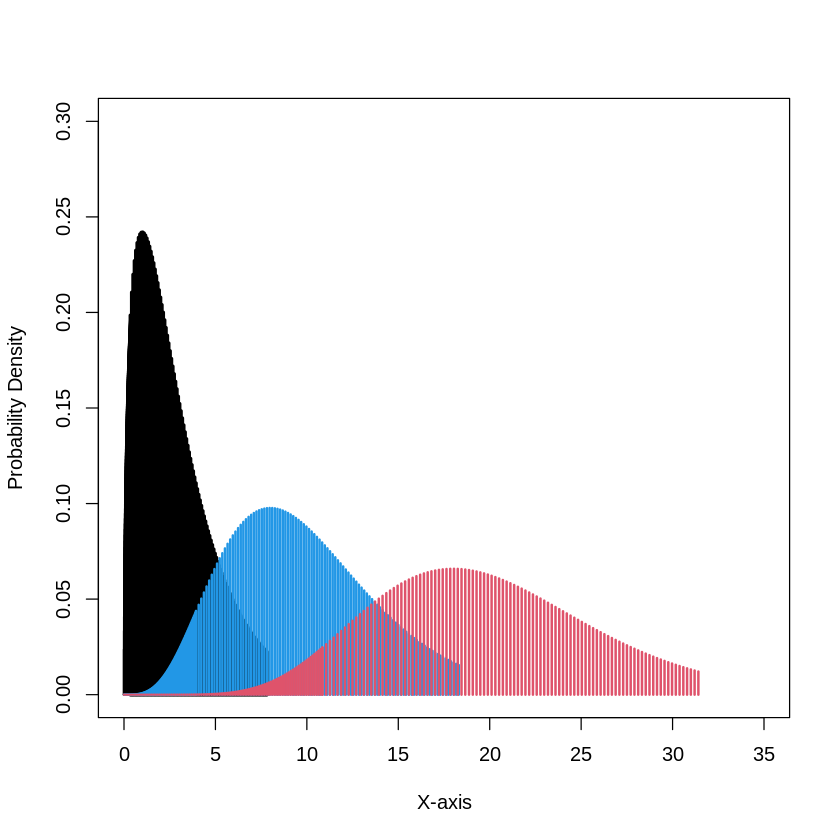

In [15]:

plot(1, type = "n", xlim = c(0, 35), ylim = c(0, 0.3), xlab = "X-axis", ylab = "Probability Density")
v <- 3
curve(dchisq(x, v), qchisq(0.05, v), qchisq(0.95, v), add = TRUE, type = "h", col = 1, lwd = 3)
curve(dchisq(x, v), 0, qchisq(0.05, v), add = TRUE, type = "h", col = 1, lwd = 2)
v <- 10
curve(dchisq(x, v), qchisq(0.05, v), qchisq(0.95, v), add = TRUE, type = "h", col = 4, lwd = 2)
curve(dchisq(x, v), 0, qchisq(0.05, v), add = TRUE, type = "h", col = 4, lwd = 2)
v <- 20
curve(dchisq(x, v), qchisq(0.05, v), qchisq(0.95, v), add = TRUE, type = "h", col = 2, lwd = 2)
curve(dchisq(x, v), 0, qchisq(0.05, v), add = TRUE, type = "h", col = 2, lwd = 2)

In [ ]:
#
# suvaptnsn pukvotntas tns N(0,1)
# t_2  t_5  t_30
#

plot(dnorm,xlim=c(-5,5),lwd=2,ylab="Density")
curve(dt(x,df=2),xlim=c(-5,5),col="blue",add=T)
curve(dt(x,df=5),xlim=c(-5,5),col="red",add=T)
curve(dt(x,df=30),xlim=c(-5,5),col="green",add=T)
legend(1.3,0.4,legend=c("N(0,1)","Student  df=2",
      "Student  df=5","Student  df=30"),col=c(1,"blue","red","green"),lwd=2)

In [9]:
#  posostiaia snmeia tns t_2 t_5 t_30 t_50 t_100
#

pt(-2,df=2)
qt(0.05,df=2)
qt(0.05,df=5)
qt(0.05,df=30)
qt(0.95,df=c(2,5,30,50,100))
qnorm(0.95)

[1] 0.09175171

[1] -2.919986

[1] -2.015048

[1] -1.697261

[1] 2.919986 2.015048 1.697261 1.675905 1.660234

[1] 1.644854

In [10]:
#  N(m,s^2) Confidence Interval for m, diaspora gvwstn
#
###########################################################################
#
# didetai to deigma
#

x<-c(
-1.26, -2.05,  3.77,  3.88, -2.24,  0.13, -2.47,  0.18,  4.90, -1.76)


sigma<-3  #sas to divw
          #  sd(x) eivai kovta sto 3
n<-length(x)
n
Mx<-mean(x)
Mx
# 95% Conf Inter for m
a<-0.05
c(Mx+qnorm(a/2)*sigma/sqrt(n),Mx+qnorm(1-a/2)*sigma/sqrt(n))
#c(Mx-qnorm(1-a/2)*sigma/sqrt(n),Mx-qnorm(a/2)*sigma/sqrt(n))

# 90% Conf Inter for m
a<-0.10
c(Mx+qnorm(a/2)*sigma/sqrt(n),Mx+qnorm(1-a/2)*sigma/sqrt(n))

for (a in c(0.05,0.1,0.2)){
cat("s.e. 1-a=",1-a,
"LB=",round(Mx+qnorm(a/2)*sigma/sqrt(n),4),
"UB=",round(Mx+qnorm(1-a/2)*sigma/sqrt(n),4),"\n")
}

[1] 10

[1] 0.308

[1] -1.551385  2.167385

[1] -1.252445  1.868445

s.e. 1-a= 0.95 LB= -1.5514 UB= 2.1674 
s.e. 1-a= 0.9 LB= -1.2524 UB= 1.8684 
s.e. 1-a= 0.8 LB= -0.9078 UB= 1.5238 


In [11]:
#  N(m,s^2) Confidence Interval for m, variance unknown
#
#############################################################################
# exw movo tis deigmatikes parametrous

n<-12
Mx<-65
S<-3
cat("n=",n,"Mx=",Mx,"S^2=",S^2,"\n")
for (a in c(0.05,0.1,0.2)){
cat("s.e. 1-a=",1-a,"  t",n-1,"(",a/2,")=",round(qt(1-a/2,n-1),3),
"  [",round(Mx+qt(a/2,n-1)*S/sqrt(n),4),",",
round(Mx+qt(1-a/2,n-1)*S/sqrt(n),4),"]","\n")
}

n= 12 Mx= 65 S^2= 9 
s.e. 1-a= 0.95   t 11 ( 0.025 )= 2.201   [ 63.0939 , 66.9061 ] 
s.e. 1-a= 0.9   t 11 ( 0.05 )= 1.796   [ 63.4447 , 66.5553 ] 
s.e. 1-a= 0.8   t 11 ( 0.1 )= 1.363   [ 63.8192 , 66.1808 ] 


In [12]:
# exw oloklnpo to deigma

x<-c(
0.2, -0.5, -1.3, -1.6, -0.7, 0.4, -0.1, 0.0, -0.6, -1.1, -1.2, -0.8)

n<-length(x)
Mx<-mean(x)
S<-sd(x)
cat("n=",n,"Mx=",Mx,"S^2=",var(x),"\n")
# 95% Conf Inter for m
# METHOD A
a<-0.05
c(Mx+qt(a/2,n-1)*S/sqrt(n),Mx+qt(1-a/2,n-1)*S/sqrt(n))
#c(Mx-qt(1-a/2,n-1)*S/sqrt(n),Mx-qt(a/2,n-1)*S/sqrt(n))

# METHOD B   1-a=0.95
t.test(x)

n= 12 Mx= -0.6083333 S^2= 0.4008333 


[1] -1.0105948 -0.2060719


	One Sample t-test

data:  x
t = -3.3285, df = 11, p-value = 0.006729
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -1.0105948 -0.2060719
sample estimates:
 mean of x 
-0.6083333 


In [13]:
# 1-a=0.90

a<-0.1
# METHOD A
c(Mx+qt(a/2,n-1)*S/sqrt(n),Mx+qt(1-a/2,n-1)*S/sqrt(n))
# METHOD B
t.test(x,conf.level=1-a)

t.test(x,alternative="greater")
t.test(x,alternative="less")

[1] -0.9365569 -0.2801098


	One Sample t-test

data:  x
t = -3.3285, df = 11, p-value = 0.006729
alternative hypothesis: true mean is not equal to 0
90 percent confidence interval:
 -0.9365569 -0.2801098
sample estimates:
 mean of x 
-0.6083333 



	One Sample t-test

data:  x
t = -3.3285, df = 11, p-value = 0.9966
alternative hypothesis: true mean is greater than 0
95 percent confidence interval:
 -0.9365569        Inf
sample estimates:
 mean of x 
-0.6083333 



	One Sample t-test

data:  x
t = -3.3285, df = 11, p-value = 0.003364
alternative hypothesis: true mean is less than 0
95 percent confidence interval:
       -Inf -0.2801098
sample estimates:
 mean of x 
-0.6083333 
